In [631]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns



In [632]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [633]:
downloaded = drive.CreateFile({'id':'1qnWr5tqSjHDrq3H3KEvgeMVGM28e0XOM'}) # replace the id with id of file you want to access
downloaded.GetContentFile('capital_bike_combined.csv')

downloaded = drive.CreateFile({'id':'1hLmX500qN6d9AwqNu7C68S1CLHzIWb8B'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202004-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'19IlB3lo5kGW8NIYJ5njeb3nszSpH5pnc'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202005-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1WDmQ4vTi9aF7GFd1K1lUpd1rFtfFbJlv'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202006-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1HjJVhAW5ShUhjP_Te_shHfwb1SL9_g3f'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202007-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1JrcFOpE8pt_cW3WSRgqcphraBCeB8DHT'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202008-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1sn8YS229HGrSo_88xXwjtHjeMJJZTm8M'}) # replace the id with id of file you want to access
downloaded.GetContentFile('TEMP_USA.csv')

In [634]:
#imporing capitalbikeshare-tripdata dataset
temp = pd.read_csv("TEMP_USA.csv") 
temp.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
0,38.88481,-77.00609,2015,1,1,0.00,2.62,71.46,101.16,9.12,5.11,-4.02,-4.87,-0.39,3.70
1,38.88481,-77.00609,2015,1,2,0.00,3.16,73.91,101.57,7.84,6.07,-1.76,-2.33,1.79,4.81
2,38.88481,-77.00609,2015,1,3,4.49,4.18,96.42,101.75,5.26,4.38,-0.87,1.35,2.02,1.49
3,38.88481,-77.00609,2015,1,4,10.86,7.35,98.24,100.28,11.12,14.93,3.81,8.88,9.66,6.29
4,38.88481,-77.00609,2015,1,5,0.00,2.34,61.61,101.63,9.17,5.02,-4.14,-6.45,0.15,7.72


In [635]:
station_status = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/station_status.csv") 
station_status.head()

,data__stations__is_installed,data__stations__num_bikes_disabled,data__stations__is_returning,data__stations__station_status,data__stations__last_reported,data__stations__eightd_has_available_keys,data__stations__legacy_id,data__stations__num_ebikes_available,data__stations__is_renting,data__stations__num_docks_disabled,data__stations__num_docks_available,data__stations__num_bikes_available,data__stations__station_id,last_updated,ttl
0,1,1,1,active,1599426428,False,1,0,1,0,11,3,1,1.599427e+09,5.0
1,1,1,1,active,1599421244,False,2,0,1,0,9,1,2,NaN,NaN
2,1,0,1,active,1599424089,False,3,0,1,0,1,16,3,NaN,NaN
3,1,0,1,active,1599426176,False,4,0,1,0,8,3,4,NaN,NaN
4,1,0,1,active,1599424516,False,5,0,1,0,7,4,5,NaN,NaN


In [636]:
#imporing capitalbikeshare-tripdata dataset
data = pd.read_csv("202004-capitalbikeshare-tripdata.csv") 
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,495C10604A58ACA9,docked_bike,2020-04-27 10:33:08,2020-04-27 10:53:26,4th & M St SW,21,New York Ave & 15th St NW,124.0,38.8767,-77.0178,38.8990,-77.0334,member
1,08A5138C88D182A5,docked_bike,2020-04-27 11:20:07,2020-04-27 11:42:55,17th & K St NW,100,4th & M St SW,21.0,38.9028,-77.0386,38.8767,-77.0178,member
2,505E308BDCA9C792,docked_bike,2020-04-27 09:45:45,2020-04-27 09:54:32,1st & M St SE,578,4th & M St SW,21.0,38.8769,-77.0061,38.8767,-77.0178,member
3,D3436FC6CCF04110,docked_bike,2020-04-14 13:16:54,2020-04-14 13:28:59,11th & Kenyon St NW,15,Thomas Circle,178.0,38.9295,-77.0278,38.9059,-77.0325,casual
4,37B8457C89257BD5,docked_bike,2020-04-19 20:42:25,2020-04-19 20:51:12,13th & H St NE,97,Eastern Market / 7th & North Carolina Ave SE,96.0,38.9004,-76.9883,38.8870,-76.9968,member


In [637]:
#imporing capitalbikeshare-tripdata dataset
data = pd.read_csv("202005-capitalbikeshare-tripdata.csv") 
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,194551D7D0408225,docked_bike,2020-05-31 16:01:38,2020-05-31 16:23:05,Maine Ave & 7th St SW,95,1st & M St NE,65.0,38.8787,-77.0231,38.9057,-77.0056,casual,False
1,8AE9CED0F5BF8C69,docked_bike,2020-05-15 20:27:22,2020-05-15 20:43:39,17th St & Independence Ave SW,453,18th St & Wyoming Ave NW,76.0,38.8881,-77.0383,38.9188,-77.0416,member,False
2,DA316A2F8B6F1379,docked_bike,2020-05-27 09:30:37,2020-05-27 09:44:41,1st & Rhode Island Ave NW,60,18th St & Pennsylvania Ave NW,180.0,38.9154,-77.0123,38.8997,-77.0415,member,False
3,8E124F29987F9622,docked_bike,2020-05-16 13:06:23,2020-05-16 13:24:33,Constitution Ave & 2nd St NW/DOL,305,USDA / 12th & C St SW,117.0,38.8923,-77.0139,38.8863,-77.0282,member,False
4,1F3FE727B1983E23,docked_bike,2020-05-07 13:57:18,2020-05-07 14:20:49,Kingman Island/The Fields at RFK,645,Anacostia Park,553.0,38.8960,-76.9678,38.8734,-76.9834,casual,False


In [638]:
#imporing capitalbikeshare-tripdata dataset
data = pd.read_csv("202006-capitalbikeshare-tripdata.csv") 
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,16A86B048B01DE6F,docked_bike,2020-06-10 20:20:36,2020-06-10 20:27:28,Edgewood Rec Center,642.0,Rhode Island Ave Metro,368.0,38.924144,-77.002098,38.920682,-76.995876,member
1,661EA082175DB7E9,docked_bike,2020-06-23 06:31:23,2020-06-23 06:58:35,Wisconsin Ave & O St NW,289.0,Edgewood Rec Center,642.0,38.908490,-77.063586,38.924144,-77.002098,member
2,15C659A06C439B74,docked_bike,2020-06-06 11:49:29,2020-06-06 11:49:38,19th & K St NW,269.0,19th & K St NW,269.0,38.902204,-77.043370,38.902204,-77.043370,member
3,59AD75CFBF96DEC1,docked_bike,2020-06-06 11:52:51,2020-06-06 12:21:49,19th & K St NW,269.0,10th & K St NW,199.0,38.902204,-77.043370,38.902400,-77.026220,member
4,06F6881BEFCFC106,docked_bike,2020-06-07 15:25:45,2020-06-07 17:15:28,37th & O St NW / Georgetown University,152.0,Georgetown Harbor / 30th St NW,102.0,38.907740,-77.071652,38.902221,-77.059219,casual


In [639]:
#imporing capitalbikeshare-tripdata dataset
data = pd.read_csv("capital_bike_combined.csv") 
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,83BBA2BAF43E033F,electric_bike,2020-08-21 19:28:29,2020-08-21 20:01:51,Crystal Dr & 27th St S,10,17th & K St NW / Farragut Square,149,38.8484,-77.051,38.902,-77.0384,casual
1,5B6AD9DC894D0A99,electric_bike,2020-08-21 16:07:34,2020-08-21 16:39:15,14th & V St NW,14,NaN,NaN,38.9178,-77.0317,38.89,-77.02,casual
2,9103B03D0BE9E814,electric_bike,2020-08-21 13:11:34,2020-08-21 13:29:42,NaN,NaN,NaN,NaN,38.89,-76.99,38.9,-77.03,casual
3,48446C6C2205A658,electric_bike,2020-08-21 13:33:47,2020-08-21 13:45:36,NaN,NaN,NaN,NaN,38.9,-77.03,38.92,-77.05,casual
4,6E9F209E48DC9F0E,electric_bike,2020-08-21 16:27:16,2020-08-21 16:45:57,Maryland Ave & 17th St NE,590,New York Ave & Hecht Ave NE,418,38.902,-76.9786,38.9155,-76.9837,casual


In [640]:
dc = {'ride_id': data['ride_id'], 'rideable_type': data['rideable_type'], 'started_at': data['started_at'], 'ended_at': data['ended_at'], 'start_station_name':data['start_station_name'], 'start_station_id': data['start_station_id'], 'end_station_name': data['end_station_name'], 'end_station_id': data['end_station_id']} 
df = pd.DataFrame(dc)
df 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id
0,83BBA2BAF43E033F,electric_bike,2020-08-21 19:28:29,2020-08-21 20:01:51,Crystal Dr & 27th St S,10,17th & K St NW / Farragut Square,149
1,5B6AD9DC894D0A99,electric_bike,2020-08-21 16:07:34,2020-08-21 16:39:15,14th & V St NW,14,NaN,NaN
2,9103B03D0BE9E814,electric_bike,2020-08-21 13:11:34,2020-08-21 13:29:42,NaN,NaN,NaN,NaN
3,48446C6C2205A658,electric_bike,2020-08-21 13:33:47,2020-08-21 13:45:36,NaN,NaN,NaN,NaN
4,6E9F209E48DC9F0E,electric_bike,2020-08-21 16:27:16,2020-08-21 16:45:57,Maryland Ave & 17th St NE,590,New York Ave & Hecht Ave NE,418
...,...,...,...,...,...,...,...,...
918071,A05927C7EDB3C058,docked_bike,2020-04-09 16:58:38,2020-04-09 16:59:32,13th & E St SE,69,12th St & Pennsylvania Ave SE,497
918072,D7765E6C5790454E,docked_bike,2020-04-24 11:41:16,2020-04-24 11:50:17,3rd & M St NE,191,1st & M St NE,65
918073,7643D5003DC74AC8,docked_bike,2020-04-04 19:03:57,2020-04-04 19:33:49,Madison St & Fairfax St,494,Eads St & 12th St S,218
918074,669844C942EC5D23,docked_bike,2020-04-01 17:25:35,2020-04-01 17:33:34,22nd St & Constitution Ave NW,486,Lincoln Memorial,277


In [641]:
data = pd.read_csv("202007-capitalbikeshare-tripdata.csv") 
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,2020-07-10 20:09:42,Potomac Ave & Half St SW,570.0,4th & M St SW,21.0,38.870201,-77.010836,38.87670,-77.017800,casual
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,2020-07-30 23:32:05,Maine Ave & 9th St SW,548.0,Maine Ave & 9th St SW,548.0,38.880440,-77.025236,38.88044,-77.025236,casual
2,FBE8E99BAAED0455,electric_bike,2020-07-22 09:47:52,2020-07-22 09:53:38,NaN,NaN,NaN,NaN,38.920000,-77.000000,38.92000,-77.010000,casual
3,E7950C376FD263E4,electric_bike,2020-07-22 10:36:55,2020-07-22 10:49:03,NaN,NaN,NaN,NaN,38.920000,-77.010000,38.92000,-77.000000,casual
4,0149F273572ED43F,electric_bike,2020-07-22 15:53:55,2020-07-22 15:58:47,NaN,NaN,NaN,NaN,38.910000,-77.050000,38.90000,-77.050000,casual


In [642]:
 #attributes in capitalbikeshare-tripdata dataset
 dt_column = data.columns
 print('Primary Fields in the Bike-Sharing Dataset')
 print(dt_column)

Primary Fields in the Bike-Sharing Dataset
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [643]:
#information for Bike-sharing dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228302 entries, 0 to 228301
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             228302 non-null  object 
 1   rideable_type       228302 non-null  object 
 2   started_at          228302 non-null  object 
 3   ended_at            228302 non-null  object 
 4   start_station_name  224382 non-null  object 
 5   start_station_id    224382 non-null  float64
 6   end_station_name    222897 non-null  object 
 7   end_station_id      222897 non-null  float64
 8   start_lat           228301 non-null  float64
 9   start_lng           228301 non-null  float64
 10  end_lat             227414 non-null  float64
 11  end_lng             227414 non-null  float64
 12  member_casual       228302 non-null  object 
dtypes: float64(6), object(7)
memory usage: 22.6+ MB
None


In [644]:
#types of ride available
ride_able_no = data['rideable_type'].unique()
print(ride_able_no)
print(len(ride_able_no))

['docked_bike' 'electric_bike']
2


In [645]:
#different start in dataset
start_station_name_no = data['start_station_name'].unique()
print(start_station_name_no)
print('no. of start stations-')
print(len(start_station_name_no))

['Potomac Ave & Half St SW' 'Maine Ave & 9th St SW' nan '23rd & M St NW'
 'Wilson Blvd & N Uhle St' 'Columbia & Ontario Rd NW'
 'Georgia & Missouri Ave NW' 'Connecticut Ave & Yuma St NW'
 'Offutt Ln & Chevy Chase Dr' '11th & Kenyon St NW'
 'Rhode Island & Connecticut Ave NW'
 'Ballston Metro / Stuart St & 9th St N' '12th & Newton St NE'
 'Crystal Dr & 23rd St S'
 'Friendship Hts Metro / Wisconsin Ave & Wisconsin Cir' '4th St & K St NW'
 'East West Hwy & Blair Mill Rd' 'E Fairfax St & S Washington St'
 '8th & O St NW' 'Wakefield High School' '8th & F St NE'
 '14th & Rhode Island Ave NW' 'Georgia Ave and Fairmont St NW'
 'Court House Metro / 15th St & N Uhle St'
 '39th & Calvert St NW / Stoddert' '36th & Calvert St NW / Glover Park'
 '16th & R St NW' '4th & M St SW' '14th & Irving St NW' 'Lincoln Memorial'
 'Roosevelt Island' 'Dunn Loring Metro' '1st & H St NW'
 '3rd & Tingey St SE' 'Branch & Pennsylvania Ave SE'
 'Eastern Market Metro / Pennsylvania Ave & 7th St SE' 'Anacostia Metro'
 '

In [646]:
# different start station ID 
start_station_id_no = data['start_station_id'].unique()
print(start_station_id_no)
print('no. of start stations id-')
print(len(start_station_id_no))

[570. 548.  nan 533. 171. 517. 414. 444. 342.  15. 155. 249.  56.  12.
 321. 456. 332. 618. 413. 220. 294.  27.  31. 390. 109. 107. 430.  21.
 461. 277. 228. 603. 366. 322.  36. 120.  46. 551. 516. 148. 302. 642.
 173. 463. 358. 433.  85. 599. 666. 338.  77. 398.  20. 631. 222. 590.
 544.  83. 193. 648. 502.  73.  57. 408. 159. 296. 188.   1.  24. 133.
 110. 639. 567. 442.  58. 651.  97. 156. 653. 581. 246.  61. 367. 300.
  99. 662. 201.  18. 191. 183. 132. 290. 357. 157. 297. 100.  25.  64.
   4. 396.  87.  90. 167. 629. 394. 195. 130. 626. 552.  84. 452. 250.
 293. 202. 299.  89. 583. 646. 566. 381. 231.  45. 281. 105. 432. 492.
 372.  17. 513. 553. 104. 382. 412. 490. 177. 194. 217. 128. 146. 236.
 108. 218. 434. 337. 180. 353. 592.  86.  65. 238. 314. 429. 436. 248.
 245. 174. 454. 577.  55. 509. 138.  96.  80. 169.  33.  14. 226. 355.
 356. 368. 137. 306.  95. 496. 418. 638.  68. 439.  23. 636. 365. 482.
 234. 669. 313. 334.  60. 491. 291. 319. 410. 189.  16. 200. 578.  26.
 644. 

In [647]:
#type of member in dataset 
member_casual_no = data['member_casual'].unique()
print(member_casual_no)
print('no. of member_casual-')
print(len(member_casual_no))

['casual' 'member']
no. of member_casual-
2


In [648]:
#different between start ride and end ride to calculate travel time
difference_in_ride = ( pd.to_datetime(data['ended_at']) -  pd.to_datetime(data['started_at'])) 
print(difference_in_ride[1].seconds)
print(difference_in_ride)

4832
0        0 days 00:08:56
1        0 days 01:20:32
2        0 days 00:05:46
3        0 days 00:12:08
4        0 days 00:04:52
               ...      
228297   0 days 01:09:37
228298   0 days 00:21:18
228299   0 days 02:47:40
228300   0 days 00:34:32
228301   0 days 00:11:52
Length: 228302, dtype: timedelta64[ns]


In [649]:
# dropped the null values
data.dropna(subset = ["start_station_name","end_station_name"], inplace=True)

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500, 40000, 40500, 41000, 41500, 42000, 42500, 43000, 43500, 44000, 44500, 45000, 45500, 46000, 46500, 47000, 47500, 48000, 48500, 49000, 49500, 50000, 50500, 51000, 51500, 52000, 52500, 53000, 53500, 54000, 54500, 55000, 55500, 56000, 56500, 57000, 57500, 58000, 58500, 59000, 59500, 60000, 60500, 61000, 61500, 62000, 62500, 63000, 63500, 64000, 64500, 65000, 65500, 66000, 66500, 67000, 67500, 68000, 68500, 69000, 69500, 70000, 70500, 71000, 71500, 72000, 72500, 7

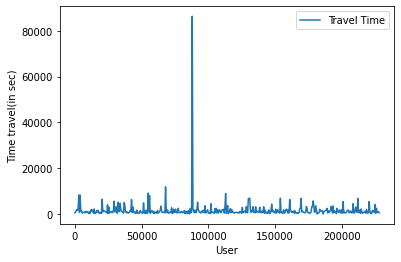

In [650]:
# plotting different travel time of different user
x = []
for i in range(len(difference_in_ride)):
  x.append(difference_in_ride[i].seconds)
for i in range(len(difference_in_ride)):
  difference_in_ride[i]=x[i]

y = [i for i in range(0,len(difference_in_ride),500)]
j=0
k = []
for i in range(0,len(difference_in_ride),500):
  if j < len(difference_in_ride):
    k.append(x[j]) 
    j = j+500
print(y)
print(k)

plt.plot(y, k, label='Travel Time')
plt.xlabel('User') 
plt.ylabel('Time travel(in sec)') 
plt.legend()
plt.show()

In [651]:
data['time_to_travel'] = difference_in_ride
data.head();

In [652]:
data1 = data[data['time_to_travel'] >= 120]
data1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_to_travel
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,2020-07-10 20:09:42,Potomac Ave & Half St SW,570.0,4th & M St SW,21.0,38.870201,-77.010836,38.876700,-77.017800,casual,536
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,2020-07-30 23:32:05,Maine Ave & 9th St SW,548.0,Maine Ave & 9th St SW,548.0,38.880440,-77.025236,38.880440,-77.025236,casual,4832
10,7DF081081823B294,electric_bike,2020-07-20 16:05:43,2020-07-20 16:24:55,Columbia & Ontario Rd NW,517.0,14th St & Colorado Ave NW,90.0,38.924158,-77.040664,38.956422,-77.032982,casual,1152
11,6F354AFFFD216948,electric_bike,2020-07-19 20:24:04,2020-07-19 20:31:59,Georgia & Missouri Ave NW,414.0,Grant Circle,633.0,38.961336,-77.027898,38.942040,-77.018205,casual,475
12,CBFEDBCDC47745C8,electric_bike,2020-07-20 08:28:31,2020-07-20 09:09:34,Connecticut Ave & Yuma St NW,444.0,Connecticut Ave & Yuma St NW,444.0,38.947055,-77.065241,38.947070,-77.065110,casual,2463


In [653]:
import calendar
v = pd.Series([i for i in range(len(data1))])
data1 = data1.reindex(v)
s = pd.to_datetime(data1['ended_at'])

print(s)
print(s[0].month)
print(s[0].year)
print(s[0].day)
print(s[1].weekday())
print(calendar.day_name[s[1].weekday()])
m1 = []
m2 = []
m3 = []
m4 = []
v=0
for k in range(len(s)):
  m1.append(s[k].month)
for k in range(len(s)):
  m2.append(s[k].year)
for k in range(len(s)):
  m3.append(s[k].day)
#for k in range(len(s)):
 # if s[k] is not None:
  #  m4.append(calendar.day_name[s[k].weekday()])
  #else :
   # m4.append([s[0].weekday()])


0        2020-07-10 20:09:42
1        2020-07-30 23:32:05
2                        NaT
3                        NaT
4                        NaT
                 ...        
216953   2020-07-23 18:18:21
216954   2020-07-07 20:02:44
216955   2020-07-11 15:39:11
216956   2020-07-15 13:23:13
216957   2020-07-05 14:44:59
Name: ended_at, Length: 216958, dtype: datetime64[ns]
7
2020
10
3
Thursday


In [654]:
dc = {'ride_id': data1['ride_id'], 'rideable_type': data1['rideable_type'], 'started_at': data1['started_at'], 'MO' : m1, 'YEAR':m2, 'DY':m3, 'start_station_id': data1['start_station_id'], 'end_station_name': data1['end_station_name'], 'end_station_id': data1['end_station_id'], 'time_to_travel': data1['time_to_travel'] } 
df = pd.DataFrame(dc)
df 

,ride_id,rideable_type,started_at,MO,YEAR,DY,start_station_id,end_station_name,end_station_id,time_to_travel
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,7.0,2020.0,10.0,570.0,4th & M St SW,21.0,536
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,7.0,2020.0,30.0,548.0,Maine Ave & 9th St SW,548.0,4832
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
216953,3B93FABBC4367C4A,docked_bike,2020-07-23 18:12:48,7.0,2020.0,23.0,440.0,Adams Mill & Columbia Rd NW,17.0,333
216954,8F545743472BD67C,docked_bike,2020-07-07 19:46:57,7.0,2020.0,7.0,173.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,169.0,947
216955,FC057CBC640E90AD,docked_bike,2020-07-11 15:27:23,7.0,2020.0,11.0,277.0,8th & D St NW,303.0,708
216956,7A766336D2E52BCD,docked_bike,2020-07-15 13:12:41,7.0,2020.0,15.0,599.0,18th St & Wyoming Ave NW,76.0,632


In [655]:
result = pd.merge(df, temp, how='left', on=['DY', 'MO','YEAR'])


In [656]:
s1 = result.query('end_station_id == 200')
s1 = s1.sort_values(by=['DY'])
s1.head()

,ride_id,rideable_type,started_at,MO,YEAR,DY,start_station_id,end_station_name,end_station_id,time_to_travel,LAT,LON,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
173262,EE8AFF53D632528B,docked_bike,2020-07-01 12:54:05,7.0,2020.0,1.0,200.0,Virginia Square Metro / Monroe St & 9th St N,200.0,1344,38.88481,-77.00609,4.35,13.35,62.69,100.11,10.38,31.17,20.79,18.64,26.18,2.37
86401,6079516A52DAB5E5,docked_bike,2020-07-01 14:24:48,7.0,2020.0,1.0,252.0,Virginia Square Metro / Monroe St & 9th St N,200.0,802,38.88481,-77.00609,4.35,13.35,62.69,100.11,10.38,31.17,20.79,18.64,26.18,2.37
72047,9EF942A1BAF5A72A,docked_bike,2020-07-01 19:06:21,7.0,2020.0,1.0,216.0,Virginia Square Metro / Monroe St & 9th St N,200.0,5497,38.88481,-77.00609,4.35,13.35,62.69,100.11,10.38,31.17,20.79,18.64,26.18,2.37
138954,AC1DFA457C53AA82,docked_bike,2020-07-01 21:29:46,7.0,2020.0,1.0,216.0,Virginia Square Metro / Monroe St & 9th St N,200.0,141,38.88481,-77.00609,4.35,13.35,62.69,100.11,10.38,31.17,20.79,18.64,26.18,2.37
36351,96BFA1B8A82F28D0,docked_bike,2020-07-02 15:37:44,7.0,2020.0,2.0,249.0,Virginia Square Metro / Monroe St & 9th St N,200.0,685,38.88481,-77.00609,0.16,12.07,53.70,100.17,13.50,33.25,19.75,17.03,27.13,4.61


In [657]:
s3 =s1.groupby(["rideable_type","DY"])

In [658]:
s4 = temp.query('YEAR == 2020 and MO == 4')
s4 = s4.sort_values(by=['MO'])
s4.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
1917,38.88481,-77.00609,2020,4,1,0.68,5.14,76.67,100.00,8.51,12.53,4.01,4.20,8.02,3.69
1944,38.88481,-77.00609,2020,4,28,0.55,6.28,77.54,101.10,9.14,15.40,6.25,7.22,10.96,4.05
1943,38.88481,-77.00609,2020,4,27,1.12,5.39,72.23,100.64,9.56,15.10,5.54,4.97,9.68,4.03
1942,38.88481,-77.00609,2020,4,26,11.27,7.75,90.66,99.82,6.22,14.69,8.47,10.09,11.59,5.19
1941,38.88481,-77.00609,2020,4,25,3.82,7.28,83.55,100.59,8.58,16.52,7.94,9.30,11.99,4.42


In [659]:
s3 =s1.groupby(["DY","MO","PS","T2M_RANGE","T2M_MAX","T2M_MIN","RH2M","rideable_type"]).size()
s5 = []
s6 = []
s3 = pd.DataFrame(s3,columns=['count'])
modified = s3.reset_index()
a = 0
for i in range(len(modified)):
  if(modified['rideable_type'][i] == 'docked_bike'):
    s5.append(modified['count'][i])
    s6.append(a)
  else:
    s6.append(modified['count'][i])
    s5.append(a)
print(s6)
print(s5)
modified['docked_b'] = s5
modified['electric_b'] = s6
modified

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 2, 0, 1, 0, 3, 0, 2, 0]
[4, 10, 15, 12, 10, 10, 4, 4, 6, 7, 0, 10, 0, 9, 6, 4, 4, 10, 5, 0, 7, 0, 11, 2, 9, 2, 6, 5, 4, 0, 2, 0, 6, 0, 4, 0, 7, 0, 4, 0, 2]


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,count,docked_b,electric_b
0,1.0,7.0,100.11,10.38,31.17,20.79,62.69,docked_bike,4,4,0
1,2.0,7.0,100.17,13.50,33.25,19.75,53.70,docked_bike,10,10,0
2,3.0,7.0,100.17,14.28,36.17,21.88,48.75,docked_bike,15,15,0
3,4.0,7.0,100.27,11.98,34.86,22.88,55.00,docked_bike,12,12,0
4,5.0,7.0,100.45,11.90,34.69,22.79,62.46,docked_bike,10,10,0
5,6.0,7.0,100.59,12.03,35.31,23.28,67.27,docked_bike,10,10,0
6,7.0,7.0,100.63,10.59,33.35,22.76,69.50,docked_bike,4,4,0
7,8.0,7.0,100.50,11.08,33.39,22.31,67.02,docked_bike,4,4,0
8,9.0,7.0,100.39,9.85,32.44,22.59,68.34,docked_bike,6,6,0
9,10.0,7.0,100.00,11.55,33.77,22.22,67.83,docked_bike,7,7,0


In [660]:
aggregation_functions = { 'DY': 'first','docked_b': 'sum', 'electric_b': 'sum','count':'sum'}
df_new = modified.groupby(["DY"]).aggregate(aggregation_functions)
df_new['MO'] = modified['MO']
df_new['PS'] = modified['PS']
df_new['T2M_RANGE'] = modified['T2M_RANGE']
df_new['T2M_MAX'] = modified['T2M_MAX']
df_new['T2M_MIN'] = modified['T2M_MIN']
df_new['RH2M'] = modified['RH2M']
modified = df_new
modified

,DY,docked_b,electric_b,count,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
DY,,,,,,,,,,
1.0,1.0,4,0,4,7.0,100.17,13.50,33.25,19.75,53.70
2.0,2.0,10,0,10,7.0,100.17,14.28,36.17,21.88,48.75
3.0,3.0,15,0,15,7.0,100.27,11.98,34.86,22.88,55.00
4.0,4.0,12,0,12,7.0,100.45,11.90,34.69,22.79,62.46
5.0,5.0,10,0,10,7.0,100.59,12.03,35.31,23.28,67.27
6.0,6.0,10,0,10,7.0,100.63,10.59,33.35,22.76,69.50
7.0,7.0,4,0,4,7.0,100.50,11.08,33.39,22.31,67.02
8.0,8.0,4,0,4,7.0,100.39,9.85,32.44,22.59,68.34
9.0,9.0,6,0,6,7.0,100.00,11.55,33.77,22.22,67.83


In [661]:
#X = modified.drop(['rideable_type','docked_b','electric_b'], axis=1)
#y = modified['rideable_type']
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [662]:
from sklearn.svm import SVC
#svclassifier = SVC(kernel='poly', degree=8)
#svclassifier.fit(X_train, y_train)


In [663]:
#y_pred = svclassifier.predict(X_test)


In [664]:
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [665]:
#bike = {'docked_bike': 1,'electric_bike': 0}

#modified.rideable_type = [bike[item] for item in modified.rideable_type]
#modified.head()

In [666]:
#print(y_pred)
#print(y_test)

In [667]:
!pip3 install quandl
!pip3 install sklearn
import quandl, math
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
X = np.array(modified.drop(['count','docked_b','electric_b'], 1))
y = np.array(modified['docked_b'])

In [668]:
X = preprocessing.scale(X)

In [669]:
y = np.array(modified['docked_b'])

In [670]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [671]:
clf = LinearRegression()

In [672]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)


-0.32670164705200194
